<a href="https://colab.research.google.com/github/Agastyasourcecodes/ML_Placement_predictor/blob/main/placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("clg_placement.csv")

In [ ]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.shape

(10000, 10)

In [ ]:
df = df[['CGPA', 'Placement', 'IQ', 'Internship_Experience']]
df.head()

,CGPA,Placement,IQ,Internship_Experience
0,6.28,No,107,No
1,5.37,No,97,No
2,5.83,No,109,No
3,5.75,No,122,Yes
4,7.69,No,96,No


In [ ]:
import matplotlib.pyplot as plt

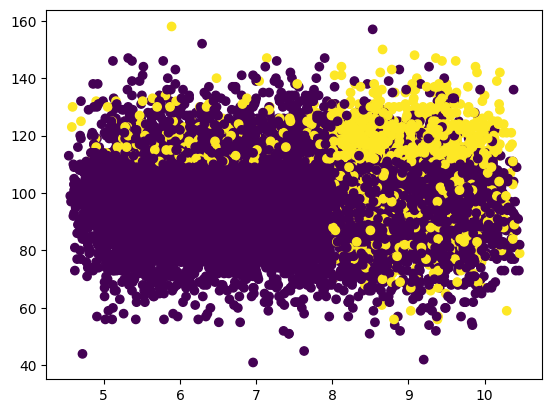

In [ ]:
plt.scatter(df['CGPA'],df['IQ'],c=df['Placement'].map({'Yes':1,'No':0}))

In [ ]:
# X: CGPA and IQ
X = df.iloc[:, [0, 2]]

# Y: Placement
Y = df.iloc[:, 1]

In [ ]:
X

,CGPA,IQ
0,6.28,107
1,5.37,97
2,5.83,109
3,5.75,122
4,7.69,96
...,...,...
9995,8.29,119
9996,9.34,70
9997,6.25,89
9998,8.92,107


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-0.78787791, -0.29901385],
       [-0.63768586,  0.63293125],
       [-0.08470604, -1.03125642],
       ...,
       [ 1.05538816, -2.09633654],
       [-0.08470604, -2.22947155],
       [ 0.57067745,  0.76606627]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
#model training
clf.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
Y_test

,Placement
9031,No
6222,No
9882,No
8731,No
2394,No
...,...
4798,No
8590,No
5402,No
5264,No


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,y_pred)

0.841

In [ ]:
from mlxtend.plotting import plot_decision_regions